## People verification

#### Alberto Rincón Borreguero

### OCR on personal IDs

This is done with Google's Vision API.

The procedure is to get the image, transform it to the format that accepts Vision API and make the call to get the results.

In [14]:
from google.cloud import vision
from google.cloud.vision import types
from PIL import Image
import pylab as plt
import cv2
%matplotlib inline

In [18]:
def encode_image(image):
    """
    Encodes the image to bytes
    """
    _, img_png = cv2.imencode('.png', image)
    return img_png.tobytes()

In [2]:
def detect_text_front(encoded_image):
    """Detects text in the captured video."""
    client = vision.ImageAnnotatorClient()
    image = types.Image(content=encoded_image)
    response = client.text_detection(image=image)
    texts = response.text_annotations
    return texts

This two methods allows to retrieve text from any image. Moreover, it returns bounding boxes for detected text.

Then, it is just a matter of parsing the text to get the desired information.

[Image source](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d8/Dni3anverso.jpg/220px-Dni3anverso.jpg)

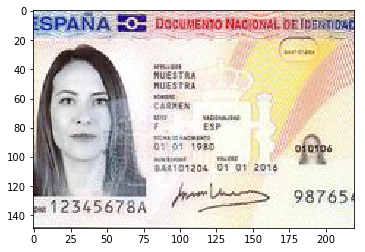

In [15]:
img = plt.imread('../images/Dni3anverso.jpg')
_ = plt.imshow(img)

In [19]:
encoded_image = encode_image(img)
detect_text_front(encoded_image)

[locale: "es"
description: "ESPA\303\221A\nDOCUMENTO NACIONAL DE IOENTIORD\nCARMEN\n01 01 1980\n4101204 01 01 2016\n987654\n12345678A\n"
bounding_poly {
  vertices {
    y: 1
  }
  vertices {
    x: 218
    y: 1
  }
  vertices {
    x: 218
    y: 140
  }
  vertices {
    y: 140
  }
}
, description: "ESPA\303\221A"
bounding_poly {
  vertices {
    y: 1
  }
  vertices {
    x: 46
    y: 1
  }
  vertices {
    x: 46
    y: 15
  }
  vertices {
    y: 15
  }
}
, description: "DOCUMENTO"
bounding_poly {
  vertices {
    x: 81
    y: 1
  }
  vertices {
    x: 126
    y: 1
  }
  vertices {
    x: 126
    y: 15
  }
  vertices {
    x: 81
    y: 15
  }
}
, description: "NACIONAL"
bounding_poly {
  vertices {
    x: 130
    y: 1
  }
  vertices {
    x: 164
    y: 1
  }
  vertices {
    x: 164
    y: 15
  }
  vertices {
    x: 130
    y: 15
  }
}
, description: "DE"
bounding_poly {
  vertices {
    x: 171
    y: 1
  }
  vertices {
    x: 177
    y: 1
  }
  vertices {
    x: 177
    y: 15
  }
  ver

### Face verification

This task is accomplish by using face_recognition library, that performs both the face's bounding box search and the verification.

In [20]:
import face_recognition as fk
from skimage.transform import resize

#### Bounding boxes

The deep learning model in which the library is backed on works very well.

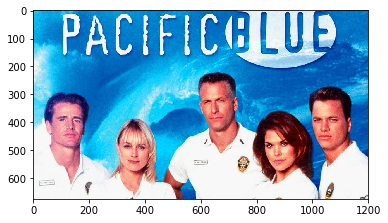

In [39]:
faces_img = cv2.imread('../images/pacific_blue.jpg')
_, encoded_image = cv2.imencode('.png', faces_img)
_ = plt.imshow(faces_img[...,::-1])

The method **face_locations** returns an array of points,heights and widths where each element correspond to a face bounding box.
They're returned in the order: **(y,x,height,width)**

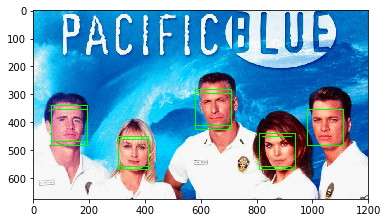

In [41]:
faces_locations = fk.face_locations(faces_img)
for face in faces_locations:
    y,x,h,w = face
    faces_img = cv2.rectangle(faces_img, (x,y),(w,h),(0,255,0),2)
_ = plt.imshow(faces_img[...,::-1])        

#### Face verification

The library's approach is the euclidean distance.

You can play with tolerance rate depending on your requirements.

In [69]:
def verify_face(image1,image2, tolerance=0.6):
    """
    Check if detected faces belongs to the same person.
    """
    res = None
    try:
        encoding1 = fk.face_encodings(image1)[0]
        encoding2 = fk.face_encodings(image2)[0]
        res = fk.compare_faces([encoding1], encoding2, tolerance=tolerance)
    except Exception as e:
        logging.error("Error: %s" %e)
    return res

Are they the same person?

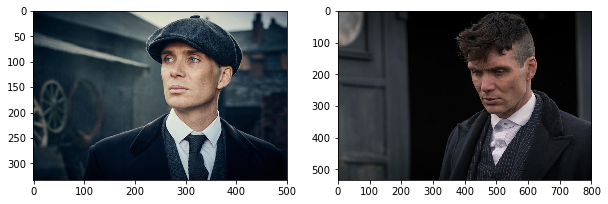

In [63]:
image1 = fk.load_image_file('../images/peaky_1.jpg')
image2 = fk.load_image_file('../images/peaky_2.jpg')

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

In [64]:
res = verify_face(image1, image2)
if res:
    print("Yes, by the order of the peaky famous blinders!")
else:
    print("No...? I think that something went wrong with Tommy.")

Yes, by the order of the peaky famous blinders!


##### Be aware of your database magnitude

This won't probably work with too many faces in the database. The more people you have registered, the more probable of false positives would be.

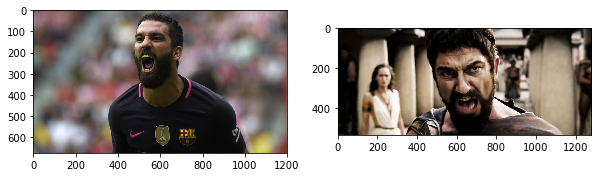

In [67]:
image1_2 = fk.load_image_file('../images/ardaturan.jpg')
image2_2 = fk.load_image_file('../images/leonidas.png')

plt.figure(figsize=(10,15))
plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)
plt.show()

In [71]:
res = verify_face(image1_2, image2_2)
if res:
    print("Yes, for the library they're the same person")
else:
    print("Incredibly, but not, they're not the same person.")

Yes, for the library they're the same person
